In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [4]:
torch.cuda.memory_reserved(0)

0

In [214]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

if device.type=='cuda':
    print(torch.cuda.get_device_name(0))

cuda
Tesla T4


In [213]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [215]:
CLASSES=10
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [113]:
class Alexnet(nn.Module):
    def __init__(self,num_classes=CLASSES):
        super().__init__()
        self.net=nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=96,kernel_size=11,stride=4),
            nn.ReLU(),
            nn.LocalResponseNorm(size=5,alpha=0.0001,beta=0.75,k=2),
            nn.MaxPool2d(kernel_size=3,stride=2),
            nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,padding=2),
            nn.ReLU(),
            nn.LocalResponseNorm(size=5,alpha=0.0001,beta=0.75,k=2),
            nn.MaxPool2d(kernel_size=3,stride=2),
            nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,stride=2)
        )
        
        self.fc_layer=nn.Sequential(
            nn.Dropout(p=0.5,inplace=True),
            nn.Linear(in_features=(256*5*5),out_features=4096),
            nn.ReLU(),
            nn.Dropout(p=0.5,inplace=True),
            nn.Linear(in_features=4096,out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096,out_features=CLASSES)
        )
        self.init_weight_bias()
    
    def init_weight_bias(self):
        for layer in self.net:
            if isinstance(layer,nn.Conv2d):
                nn.init.normal_(layer.weight,mean=0,std=0.01)
                nn.init.constant_(layer.bias,0)
        
        nn.init.constant_(self.net[4].bias,1)
        nn.init.constant_(self.net[10].bias,1)
        nn.init.constant_(self.net[12].bias,1)
        
    def forward(self,x):
        x=self.net(x)
        x=x.view(-1,256*5*5)
        return self.fc_layer(x)
    
    
    self.apply(self._init_weights)
        def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=config.initializer_range)
            if module.bias is not None:
                module.bias.data.zero_()

In [216]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=96,kernel_size=11,stride=4)
        self.local_response1=nn.LocalResponseNorm(size=5,alpha=0.0001,beta=0.75,k=2)
        self.pool1 = nn.MaxPool2d(kernel_size=3,stride=2)
        self.conv2 = nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,padding=2)
        self.local_response2=nn.LocalResponseNorm(size=5,alpha=0.0001,beta=0.75,k=2)
        self.pool2=nn.MaxPool2d(kernel_size=3,stride=2)
        self.conv3=nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,padding=1)
        self.conv4=nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,padding=1)
        self.conv5=nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,padding=1)
        self.pool5=nn.MaxPool2d(kernel_size=3,stride=2)
        self.fc1 = nn.Linear(in_features=(256*5*5),out_features=4096)
        self.fc2 = nn.Linear(in_features=4096,out_features=4096)
        self.fc3 = nn.Linear(in_features=4096,out_features=CLASSES)

    def forward(self, x):
        x = self.pool1(F.relu(self.local_response1(self.conv1(x))))
        x = self.pool2(F.relu(self.local_response2(self.conv2(x))))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool5(F.relu(self.conv5(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.dropout(x, 0.5)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, 0.5)
        x = self.fc3(x)
        return x

In [180]:
transform_conf=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

In [181]:
BATCH_SIZE=64
train_dataset=datasets.FashionMNIST('/home/ubuntu/gpu_work/',train=True,download=True,transform=transform_conf,)
test_dataset=datasets.FashionMNIST('/home/ubuntu/gpu_work/',train=False,download=True,transform=transform_conf)

In [182]:
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=BATCH_SIZE,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=BATCH_SIZE,shuffle=True)

tensor(4) Coat


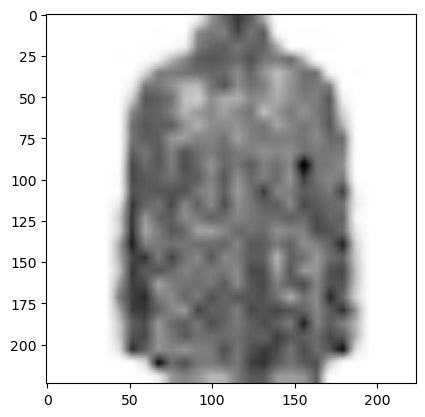

In [205]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def matplotlib_imshow(img):
    img=img.mean(dim=0)
    img=img/2 + 0.5
    npimg=img.numpy()
    plt.imshow(npimg,cmap="Greys")
    
dataiter=iter(train_loader)
image,label=next(dataiter)

img_grid=torchvision.utils.make_grid(image[0])
matplotlib_imshow(img_grid)
print(label[0],class_names[label[0]])

In [165]:
#EPOCHS=10
#model=Alexnet().to(device)
model=Net().to(device)
optimizer=optim.Adam(params=model.parameters(),lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

In [169]:
def train(model,device,train_loader,optimizer,epochs):
    print("inside train")
    model.train()
    for batch_ids, (img, classes) in enumerate(train_loader):
        classes=classes.type(torch.LongTensor)
        img,classes=img.to(device),classes.to(device)
        torch.autograd.set_detect_anomaly(True)     
        optimizer.zero_grad()
        output=model(img)
        loss = loss_fn(output,classes)                
        
        loss.backward()
        optimizer.step()
    if(batch_ids +1) % 2 == 0:
        print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
            epoch, batch_ids* len(img), len(train_loader.dataset),
            100.*batch_ids / len(train_loader),loss.item()))
        

In [167]:
def test(model, device, test_loader):
    model.eval()
    test_loss=0
    correct=0
    with torch.no_grad():
        for img,classes in test_loader:
            img,classes=img.to(device), classes.to(device)
            y_hat=model(img)
            test_loss+=F.nll_loss(y_hat,classes,reduction='sum').item()
            _,y_pred=torch.max(y_hat,1)
            correct+=(y_pred==classes).sum().item()
        test_loss/=len(test_dataset)
        print("\n Test set: Avarage loss: {:.0f},Accuracy:{}/{} ({:.0f}%)\n".format(
            test_loss,correct,len(test_dataset),100.*correct/len(test_dataset)))
        print('='*30)

In [168]:
if __name__=='__main__':
    seed=42
    EPOCHS=10
    
    for epoch in range(1,EPOCHS+1):
        train(model,device,train_loader,optimizer,epoch)
        test(model,device,test_loader)

Train Epoch: 1 [29984/60000 (100%)]	Loss: 0.519252

 Test set: Avarage loss: -7,Accuracy:8385/10000 (84%)

Train Epoch: 2 [29984/60000 (100%)]	Loss: 0.331994

 Test set: Avarage loss: -8,Accuracy:8914/10000 (89%)

Train Epoch: 3 [29984/60000 (100%)]	Loss: 0.110625

 Test set: Avarage loss: -9,Accuracy:9003/10000 (90%)

Train Epoch: 4 [29984/60000 (100%)]	Loss: 0.099893

 Test set: Avarage loss: -9,Accuracy:9098/10000 (91%)

Train Epoch: 5 [29984/60000 (100%)]	Loss: 0.473195

 Test set: Avarage loss: -10,Accuracy:9140/10000 (91%)

Train Epoch: 6 [29984/60000 (100%)]	Loss: 0.297245

 Test set: Avarage loss: -9,Accuracy:9171/10000 (92%)

Train Epoch: 7 [29984/60000 (100%)]	Loss: 0.111726

 Test set: Avarage loss: -10,Accuracy:9179/10000 (92%)

Train Epoch: 8 [29984/60000 (100%)]	Loss: 0.189847

 Test set: Avarage loss: -12,Accuracy:9136/10000 (91%)

Train Epoch: 9 [29984/60000 (100%)]	Loss: 0.099459

 Test set: Avarage loss: -9,Accuracy:9196/10000 (92%)

Train Epoch: 10 [29984/60000 (100%

In [173]:
torch.save(model.state_dict(),'/home/ubuntu/Networks/alexnet_fsMNIST.pts')

In [217]:
eval_net=Net()
eval_net.load_state_dict(torch.load('/home/ubuntu/Networks/alexnet_fsMNIST.pts'))
#net = Net()
#net.load_state_dict(torch.load(PATH))
#PATH = './cifar_net.pth'
#torch.save(net.state_dict(), PATH)

<All keys matched successfully>

Ground Truth:  T-shirt/top Shirt Bag   Sneaker


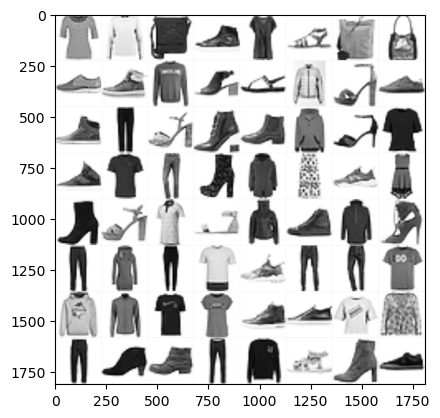

In [222]:
dataiter=iter(test_loader)
img,labels=next(dataiter)

matplotlib_imshow(torchvision.utils.make_grid(img))
print('Ground Truth: ',' '.join(f'{class_names[labels[j]]:5s}' for j in range(4)))

In [223]:
output=eval_net(img)

In [224]:
_,predicted=torch.max(output,1)

print('Predicted:', ' '.join(f'{class_names[predicted[j]]:5s}' for j in range(4)))

Predicted: T-shirt/top Pullover Bag   Sneaker


In [212]:
1+4

5